In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')

In [118]:
df = sns.load_dataset('tips')

# Target : tip

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [119]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [120]:
sex_oder = ['Female','Male']
smoker_order = ['No','Yes']
day_oder = ['Thur','Fri','Sat','Sun']
time_order = ['Lunch','Dinner']

encoder = OneHotEncoder(
    categories=[sex_oder,smoker_order,day_oder,time_order],
    handle_unknown='ignore',
    sparse_output=False ,
    drop='first' 
)

encoder.fit_transform(df[['sex','smoker','day','time']])

,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Dinner
0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
239,1.0,0.0,0.0,1.0,0.0,1.0
240,0.0,1.0,0.0,1.0,0.0,1.0
241,1.0,1.0,0.0,1.0,0.0,1.0
242,1.0,0.0,0.0,1.0,0.0,1.0


# deuxieme dataset

In [121]:
df = sns.load_dataset("penguins")

# target: species

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [122]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [123]:
sex_oder=['Female','Male']

encoder =OneHotEncoder(
    categories=[sex_oder],
    handle_unknown='ignore',
    sparse_output=False,
    drop='first'
)

encoder.fit_transform(df[['sex']])

/home/romaric420/Analyse/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,sex_Male
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
339,0.0
340,0.0
341,1.0
342,0.0


In [124]:
island_oder=['Biscoe','Dream','Torgersen']
encoder = OneHotEncoder(
    categories=[island_oder],
    handle_unknown='ignore',
    sparse_output=False,
    drop='first'
)
encoder.fit_transform(df[['island']])

,island_Dream,island_Torgersen
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
339,0.0,0.0
340,0.0,0.0
341,0.0,0.0
342,0.0,0.0


# datasets 3

In [125]:
df = sns.load_dataset("flights")
# target : passengers
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [126]:
df['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

<Axes: >

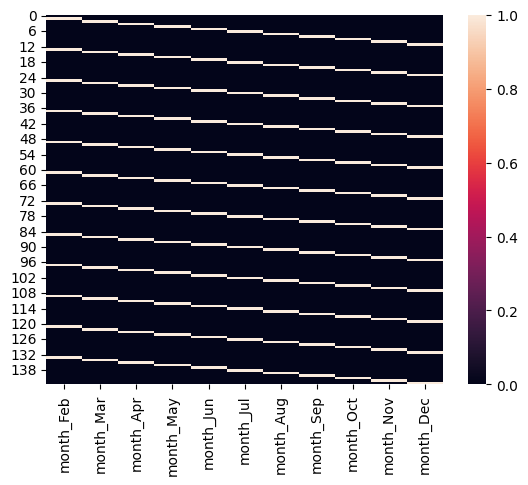

In [127]:
month_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']    

encoder = OneHotEncoder(
    categories=[month_order],
    handle_unknown='ignore',
    sparse_output=False,
    drop='first'
)

sns.heatmap(encoder.fit_transform(df[['month']]))

In [128]:
encoder = OrdinalEncoder(
    categories=[month_order],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
encoder.fit_transform(df[['month']])

,month
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
139,7.0
140,8.0
141,9.0
142,10.0


# dataset 4

In [129]:
df = sns.load_dataset("exercise")

# target : pulse
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [130]:
df['time'].unique()

['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']

In [131]:
df['time'].replace({'1 min':1,'15 min':15,'30 min':30})

/tmp/ipykernel_24935/13469545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time'].replace({'1 min':1,'15 min':15,'30 min':30})
/tmp/ipykernel_24935/13469545.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['time'].replace({'1 min':1,'15 min':15,'30 min':30})


0      1
1     15
2     30
3      1
4     15
      ..
85    15
86    30
87     1
88    15
89    30
Name: time, Length: 90, dtype: category
Categories (3, int64): [1, 15, 30]

In [132]:
diet_order=['low fat','no fat','regular']
kind_order=['rest','walking','running','standing']


encoder = OrdinalEncoder(
    categories=[diet_order,kind_order],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
encoder.fit_transform(df[['diet','kind']])


,diet,kind
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
85,1.0,2.0
86,1.0,2.0
87,1.0,2.0
88,1.0,2.0


# dataset 5

In [133]:
df = sns.load_dataset("taxis")

#target : total 

df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [134]:
df["dropoff_borough"].unique()

array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Staten Island'],
      dtype=object)

In [135]:
color_order=['yellow','green']
payment_order=['cash','credit','no charge','other']
pikup_zone_order=['EWR','JFK','Newark Airport','Queens','Staten Island','Bronx','Brooklyn','Manhattan']
dropoff_borough_order =['Manhattan','Brooklyn','Queens','Bronx','Staten Island','EWR','JFK','Newark Airport']

encoder = OneHotEncoder(
    categories=[color_order,payment_order,pikup_zone_order,dropoff_borough_order],
    handle_unknown='ignore',
    sparse_output=False
)

encoder.fit_transform(df[['color','payment','pickup_borough','dropoff_borough']])


,color_yellow,color_green,payment_cash,payment_credit,payment_no charge,payment_other,pickup_borough_EWR,pickup_borough_JFK,pickup_borough_Newark Airport,pickup_borough_Queens,...,pickup_borough_Brooklyn,pickup_borough_Manhattan,dropoff_borough_Manhattan,dropoff_borough_Brooklyn,dropoff_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Staten Island,dropoff_borough_EWR,dropoff_borough_JFK,dropoff_borough_Newark Airport
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6430,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
pikup_zone_order=['EWR','JFK','Newark Airport','Queens','Staten Island','Bronx','Brooklyn','Manhattan']

encoder = OneHotEncoder(
    categories=[pikup_zone_order],
    handle_unknown='ignore',
    sparse_output=False,
    drop='first'
)
encoder.fit_transform(df[['pickup_borough']])


/home/romaric420/Analyse/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,pickup_borough_JFK,pickup_borough_Newark Airport,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
6428,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6429,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6431,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [138]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [140]:
df.columns.to_list()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']